In [1]:
import pandas as pd # Data analysis
import numpy as np # Number related calc
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from sklearn.model_selection import train_test_split # For spliting data
from sklearn.linear_model import LogisticRegression # Modeling
from sklearn.metrics import confusion_matrix, accuracy_score # Evaluation

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.head(2)

,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


<img src=https://datascienceplus.com/wp-content/uploads/2018/12/data_dictionary.png>

In [4]:
len(df)

1309

<AxesSubplot:xlabel='Survived', ylabel='count'>

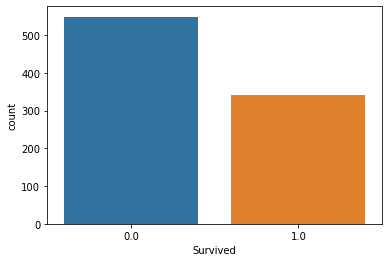

In [5]:
sns.countplot(x = 'Survived', data = df) # Seasborn - sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

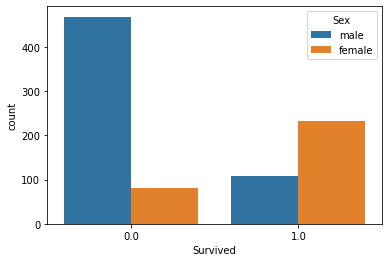

In [6]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

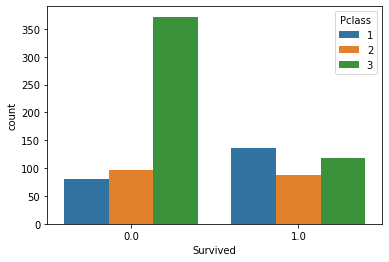

In [7]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

In [8]:
df.isnull().sum()

Unnamed: 0        0
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [9]:
df.dtypes

Unnamed: 0       int64
Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [10]:
df.head(2)

,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


In [11]:
df.drop(['Unnamed: 0','PassengerId',"Cabin",'Name','Ticket'],inplace=True,axis=1)

In [12]:
df.dtypes

Age         float64
Embarked     object
Fare        float64
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
dtype: object

In [13]:
df.isna().sum()

Age         263
Embarked      2
Fare          1
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
dtype: int64

In [14]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [15]:
df['Survived'].mean()

0.3838383838383838

In [16]:
df.fillna?

In [17]:
# df['Survived'].fillna(0, inplace = True)

In [18]:
# df['Survived'].fillna(method = 'bfill', inplace = True)

In [19]:
df['Survived'].fillna(method = 'ffill', inplace = True)

In [20]:
df.isna().sum()

Age         263
Embarked      2
Fare          1
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived      0
dtype: int64

In [21]:
df.fillna(df.mean(),inplace = True)

C:\Users\roopa\AppData\Local\Temp\ipykernel_7180\2016108766.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace = True)


In [22]:
df.isna().sum()

Age         0
Embarked    2
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [23]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [24]:
df['Embarked'].fillna('S', inplace = True)

In [25]:
df.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [26]:
df.dtypes

Age         float64
Embarked     object
Fare        float64
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
dtype: object

In [27]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [28]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
req_cols = ['Embarked','Sex']#Status
for col in req_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [30]:
df.head(1)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,2,7.25,0,3,1,1,0.0


In [31]:
df.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [32]:
df.dtypes

Age         float64
Embarked       int8
Fare        float64
Parch         int64
Pclass        int64
Sex            int8
SibSp         int64
Survived    float64
dtype: object

In [33]:
df['Survived'].unique()

array([0., 1.])

In [34]:
df['Survived'].head(5)

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [35]:
df['Survived'] = df['Survived'].astype('int')
df.head(5)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,2,7.2500,0,3,1,1,0
1,38.0,0,71.2833,0,1,0,1,1
2,26.0,2,7.9250,0,3,0,0,1
3,35.0,2,53.1000,0,1,0,1,1
4,35.0,2,8.0500,0,3,1,0,0


In [36]:
X = df.drop("Survived",axis=1)# feature or independent variable
y = df["Survived"]#target or dependent variable

In [37]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int32

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [39]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# logmodel.predict(NEW_DATA)

In [40]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, predictions)

array([[174,  15],
       [ 46,  27]], dtype=int64)

In [42]:
len(X_test)

262

In [43]:
(175+24)/(175+14+49+24)

# Rightly classified count / All counts

0.7595419847328244

In [44]:
accuracy_score(y_test, predictions)

0.767175572519084

In [45]:
X_test.head(1)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
1148,28.0,2,8.05,0,3,1,0


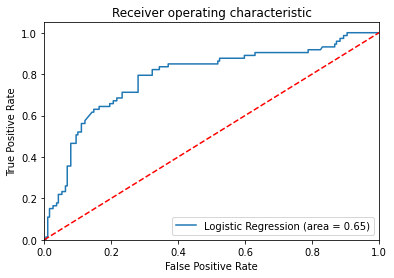

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()